In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [148]:
# Best Dataset combination that produces is protein embeddings + yeastnet + gen expressions
yeast_emb_best = pd.read_csv('Data/yeast_emb_embeddings_yeastnet_genex.csv', sep = ',', index_col = 0)
yeast_emb_best


,gene_id,gc_5_prime,gc_3_prime,gc_cds,AAA,AAC,AAG,AAT,ACA,ACC,...,data_Turco_expression_11808,data_Turco_expression_16247,data_Turco_expression_16248,data_Turco_expression_16249,data_Turco_expression_16250,data_Turco_expression_16683,data_Turco_expression_16684,data_Turco_expression_16685,data_Turco_expression_21888,data_Turco_expression_21932
0,YAL002W,0.365902,0.310000,0.372057,0.043956,0.019623,0.018053,0.039246,0.013344,0.007849,...,-1.454995,0.120081,0.120937,0.127851,0.128291,-1.802252,-1.220942,-0.876121,0.854368,1.492454
1,YAL003W,0.372881,0.253333,0.448220,0.009709,0.024272,0.077670,0.004854,0.000000,0.019417,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
2,YAL004W,0.417747,0.346667,0.451163,0.023256,0.023256,0.000000,0.046512,0.004651,0.074419,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
3,YAL008W,0.381854,0.296667,0.388889,0.045455,0.020202,0.040404,0.050505,0.015152,0.005051,...,0.200656,0.120081,0.120937,0.127851,0.128291,1.086489,1.085078,2.182672,0.616041,1.037160
4,YAL009W,0.368893,0.323333,0.414414,0.042471,0.011583,0.023166,0.027027,0.011583,0.007722,...,0.203895,0.120081,0.120937,-4.034924,0.128291,0.035502,0.011022,0.071563,0.298273,-0.242586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,YPR195C,0.334995,0.393333,0.467890,0.027523,0.000000,0.000000,0.027523,0.045872,0.009174,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
6575,YPR197C,0.376869,0.276667,0.374332,0.058824,0.021390,0.021390,0.016043,0.042781,0.005348,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
6576,YPR199C,0.329013,0.283333,0.391156,0.030612,0.020408,0.047619,0.047619,0.027211,0.003401,...,-0.006454,0.120081,0.120937,0.127851,0.128291,1.170261,0.623874,0.551316,-0.699168,-0.390249
6577,YPR200C,0.366899,0.313333,0.376923,0.038462,0.015385,0.038462,0.023077,0.030769,0.015385,...,0.291845,0.120081,0.120937,0.127851,0.128291,0.625506,0.162670,0.755235,-1.114033,-0.734796


0.8987423183745183


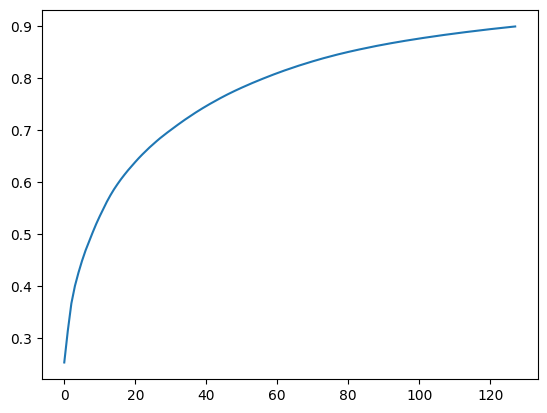

In [149]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=128
pca = PCA(n_components=N)
pca.fit_transform(yeast_emb_best.iloc[:,1:])
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

we retain around 90 % variance of the data

In [150]:
dims = 128
emb_best_pca = pd.DataFrame(PCA(n_components=dims).fit_transform(yeast_emb_best.iloc[:,1:]), index=yeast_emb_best.gene_id).reset_index()
emb_best_pca

,gene_id,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,YAL002W,0.944231,-3.402204,3.739039,-0.919890,0.800140,-1.174828,0.224012,-0.022649,-2.243328,...,-0.497098,0.121582,0.571874,-0.472372,0.030060,0.071924,-0.263753,0.588541,0.499242,0.090084
1,YAL003W,8.932813,3.280796,-6.854211,-6.396061,-0.641027,2.616253,1.836026,0.725669,-1.767972,...,0.251125,-0.235112,0.393323,-0.362024,0.878018,-0.331974,-0.260681,0.520196,-0.011660,-0.785831
2,YAL004W,-8.714336,4.918158,0.553875,1.371774,1.860370,3.393817,-1.863044,-1.533813,0.183308,...,0.944276,0.137191,1.150341,-0.279185,1.191120,-1.103598,0.784521,0.506599,-0.897260,-0.442712
3,YAL008W,1.085604,-3.446929,4.274863,-5.999678,-2.672550,-0.649407,-0.829011,-0.105207,-1.420593,...,-0.224788,0.188653,0.082300,-0.189061,-0.112262,-0.219390,-0.192260,-0.014435,-0.131268,0.229506
4,YAL009W,0.333196,-2.951615,-1.314286,0.253442,-3.503335,1.556239,1.855721,-1.024709,-0.467382,...,-0.260925,-0.318047,0.032110,0.058491,-0.289615,0.222190,-0.371392,-0.105516,0.312363,-0.293472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,YPR195C,-12.827661,3.253286,-0.233396,-0.522450,-1.427432,-1.580049,0.956745,2.126418,0.473151,...,0.127719,0.274552,0.674935,-0.751174,0.695692,-0.166417,0.301995,0.067408,-0.341430,-0.027266
6575,YPR197C,-10.532587,7.969371,0.785022,2.666510,1.432534,5.606280,-3.313612,-3.990151,-0.086487,...,1.075514,-0.476136,1.135884,-0.807467,0.292673,-1.666537,0.578781,-0.393832,0.727115,0.274108
6576,YPR199C,-4.478330,-3.681150,1.723979,-0.034061,1.360764,-0.814777,1.105107,-1.337772,1.640608,...,0.054071,0.202548,0.057987,0.199353,0.433401,0.146138,0.197068,-0.590537,0.450549,-0.802636
6577,YPR200C,4.483668,-0.359252,3.224237,-1.409898,-0.390080,-4.325463,-1.552114,-0.636678,-1.030040,...,-0.355376,0.430689,-0.102157,0.407168,0.364039,-0.089727,0.253897,0.048311,-0.172767,-0.194279


# Simple evaluation on single mutant fitness data

In [151]:
# Read in single mutant fitness data from Constanzo et al. 2016
smf_filter = pd.read_csv('Data/smf.csv', index_col = 0)

<Axes: >

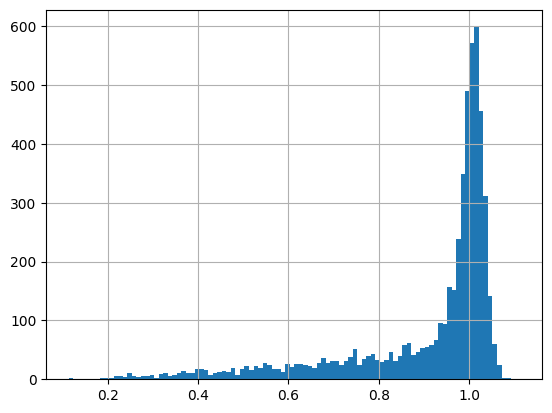

In [152]:
smf_filter.smf_30.hist(bins=100)

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

R2:  0.3063733306999723


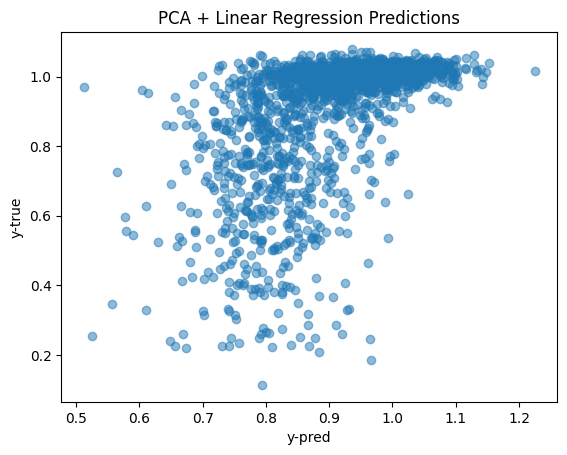

In [154]:
# How predictive are gene embeddings with PCA + Linear Regression

A = smf_filter.merge(emb_best_pca, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
print('R2: ', lm.score(X_test, y_test))

plt.scatter(lm.predict(X_test), y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("PCA + Linear Regression Predictions")
plt.show()

R2:  0.06349699195930247


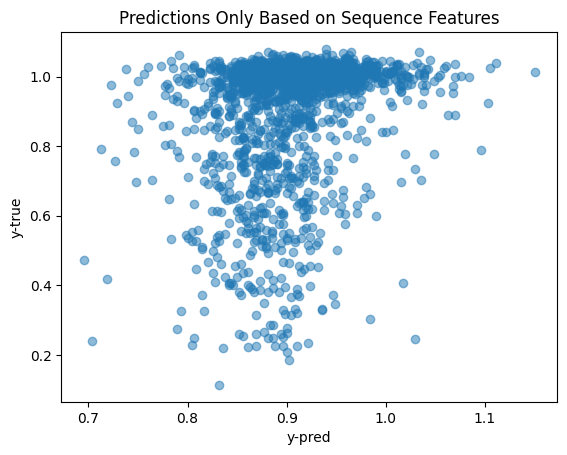

In [155]:
# Comparison to only sequence features 
seq_feats = pd.read_csv('Data/seq_feats.csv', sep = ',', index_col = 0)
A = smf_filter.merge(seq_feats, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
print('R2: ', lm.score(X_test, y_test))

plt.scatter(lm.predict(X_test), y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Predictions Only Based on Sequence Features")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.645e-01, tolerance: 1.167e-02
  model = cd_fast.enet_coordinate_descent(


R2:  0.32026731934612573


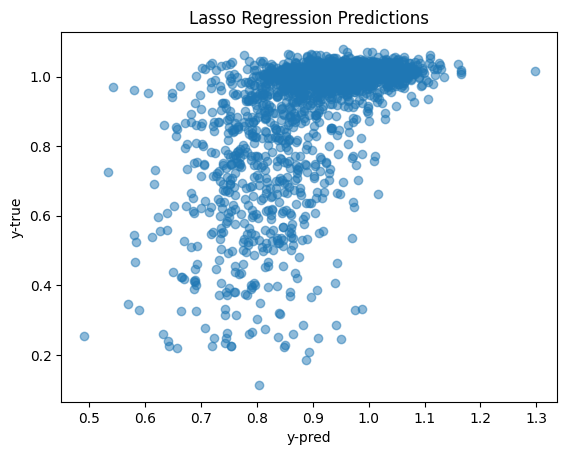

In [162]:
# use Lasso Regression (L1 Regularization) instead of PCA
A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lasso = Lasso(alpha=0.0003)
lasso.fit(X_train, y_train)

print('R2: ', lasso.score(X_test, y_test))

plt.scatter(lasso.predict(X_test), y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Lasso Regression Predictions")
plt.show()

R2:  0.32885127521636937


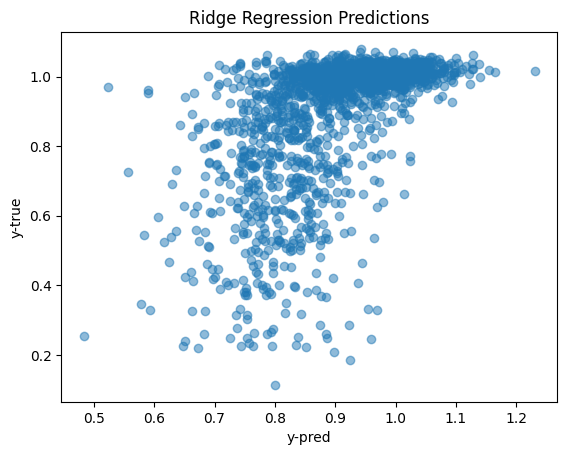

In [157]:
# use Ridge Regression (L2 Regularization) instead of PCA
A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ridge = Ridge(alpha=200.0)
ridge.fit(X_train, y_train)

print('R2: ', ridge.score(X_test, y_test))

plt.scatter(ridge.predict(X_test), y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Ridge Regression Predictions")
plt.show()

R2: 0.4771883393895502


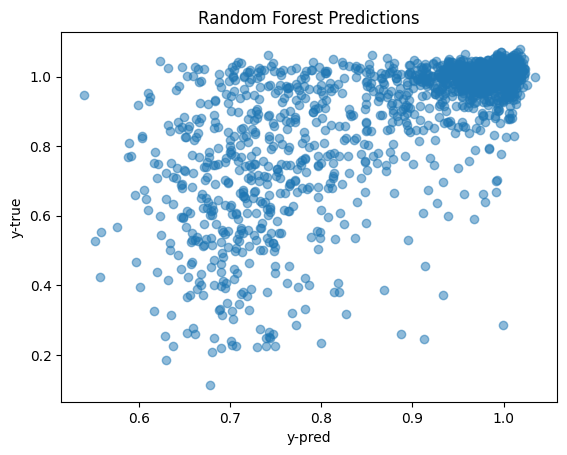

In [158]:
# use Random Forests instead of Linear Regression
A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("R2:", r2_score(y_test, y_pred))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Random Forest Predictions")
plt.show()

R2: 0.3065793559146045
RMSE: 0.15200242230431116


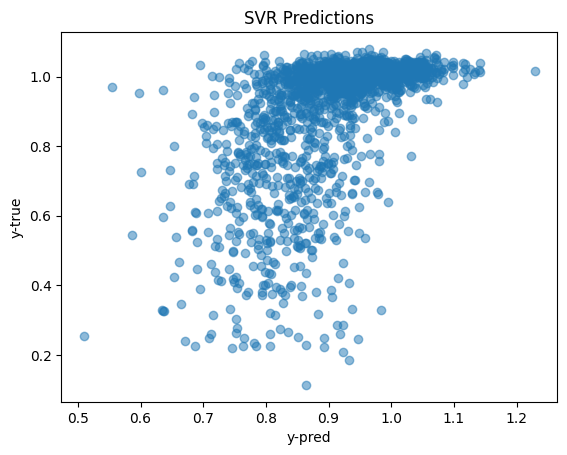

In [163]:
# use Support Vectors instead of Linear Regression
A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train an SVR model
svr = SVR(kernel='rbf', C=2.0, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("SVR Predictions")
plt.show()

R2: 0.4649307744602861
RMSE: 0.1335233168212604


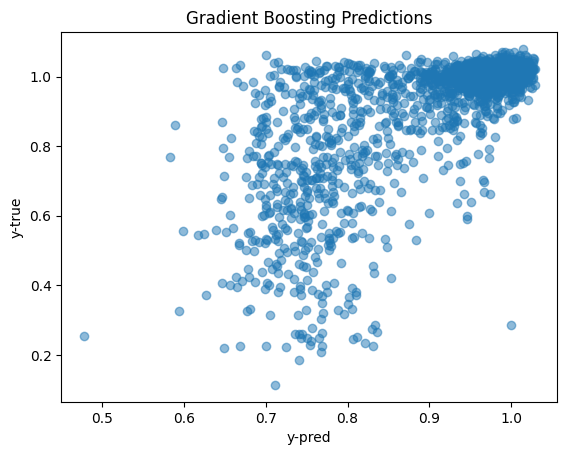

In [160]:
# use Gradient Boosting Regression instead of Linear Regression
A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

gb = GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Gradient Boosting Predictions")
plt.show()

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1817 - mae: 0.6180 - val_loss: 0.0260 - val_mae: 0.1178
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0255 - mae: 0.1166 - val_loss: 0.0250 - val_mae: 0.1185
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249 - mae: 0.1154 - val_loss: 0.0314 - val_mae: 0.1457
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0239 - mae: 0.1158 - val_loss: 0.0268 - val_mae: 0.1145
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219 - mae: 0.1055 - val_loss: 0.0244 - val_mae: 0.1121
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174 - mae: 0.0931 - val_loss: 0.0250 - val_mae: 0.1169
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 - mae: 0.0923 - val_loss: 0.0269 - val_mae: 0.1279
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166 - mae: 0.0925 - val_loss: 0.0262 - val_mae: 0.1112
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0181 - mae: 0.0989 - va

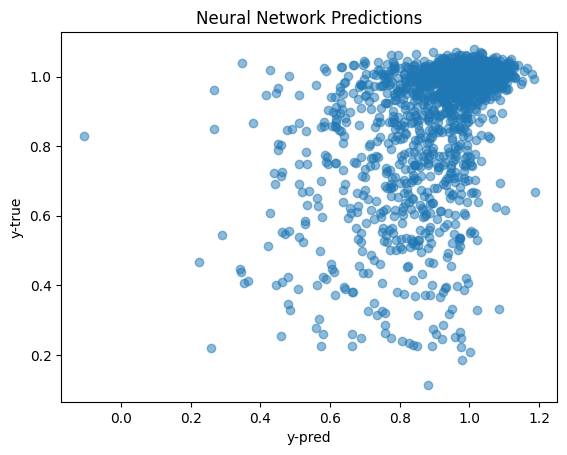

In [161]:
# Use Basic Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Neural Network Predictions")
plt.show()